#Heart Attack Prediction Using Different ML Models


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression, SelectKBest

# Importing Dataset

Attributes of the dataset explained

1.	Age: displays the age of the individual.
2.	Sex: displays the gender of the individual using the following format :
1 = male
0 = female
3.	Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
0 = typical angina
1 = atypical angina
2 = non — anginal pain
3 = asymptotic
4.	Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
5.	Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
6.	Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)
7.	Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy
8.	Max heart rate achieved: displays the max heart rate achieved by an individual.
9.	Exercise induced angina :
1 = yes
0 = no
10.	ST depression induced by exercise relative to rest: displays the value which is an integer or float.
11.	Peak exercise ST segment :
0 = upsloping
1 = flat
2 = downsloping
12.	Number of major vessels (0–3) colored by fluoroscopy: displays the value as integer or float.
13.	Thal : displays the thalassemia :
1 = normal
2 = fixed defect
3 = reversible defect
14.	Diagnosis of heart disease: Displays whether the individual is suffering from heart disease or not: 
0 = absence
1= present.

In [ ]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Visualization

([<matplotlib.patches.Wedge at 0x7fbd58ab1070>,
 [Text(-0.6342285709599224, 0.8987514226849017, 'Male'),
  Text(0.6342285709599218, -0.898751422684902, 'Female')],
 [Text(-0.3459428568872303, 0.49022804873721904, '70%'),
  Text(0.34594285688723003, -0.49022804873721926, '30%')])

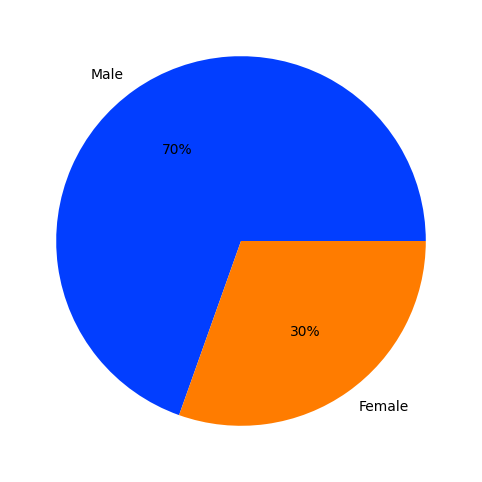

In [ ]:
data = df['sex'].value_counts()
plt.figure(figsize=(10,6))
palette_color = sns.color_palette('bright')
plt.pie(data, labels=["Male", "Female"], colors=palette_color,
        autopct='%.0f%%')

<Axes: xlabel='target', ylabel='count'>

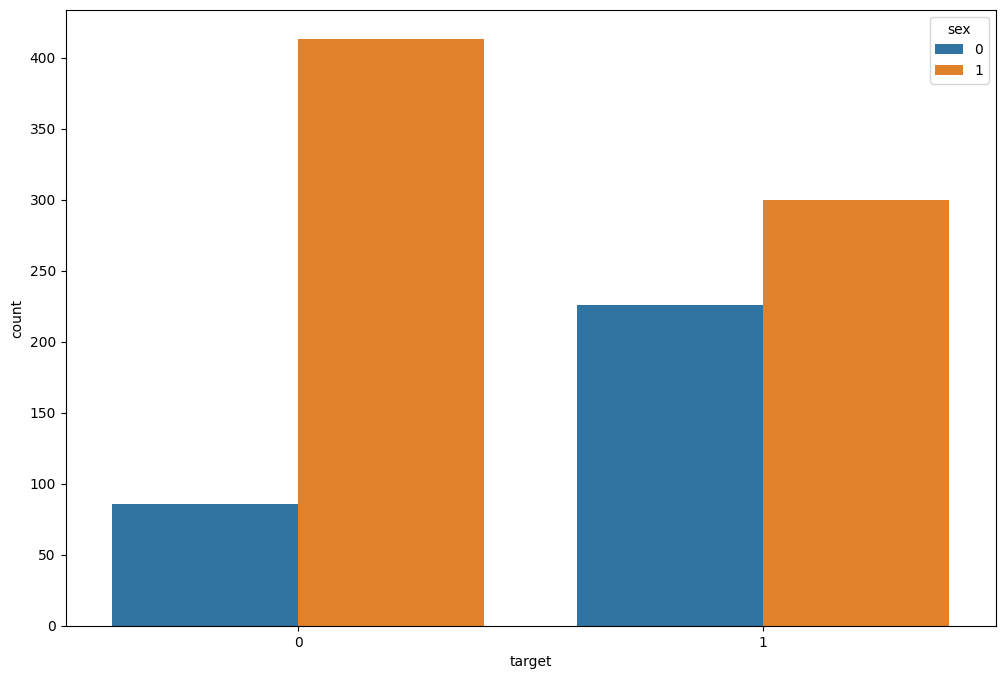

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='target', hue='sex', data=df)

Text(0, 0.5, 'count')

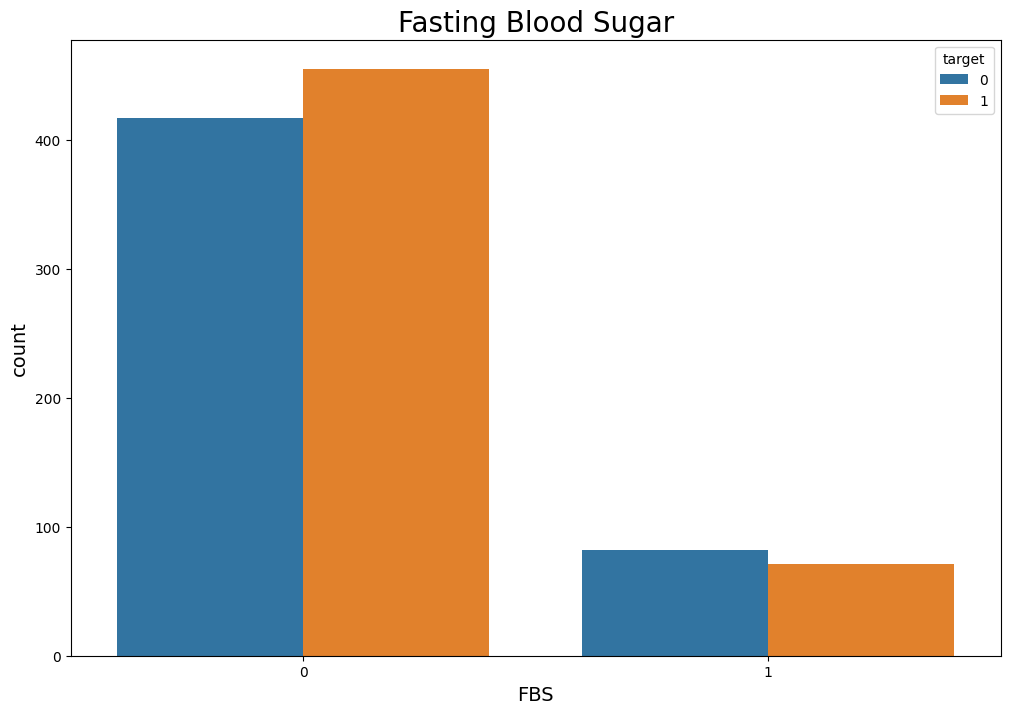

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='fbs', hue='target', data=df)
plt.title("Fasting Blood Sugar", size=20)
plt.xlabel("FBS", size=14)
plt.ylabel("count", size=14)

There are a majority of people who have resting blood sugar level below 120mg/dL

Text(0, 0.5, 'count')

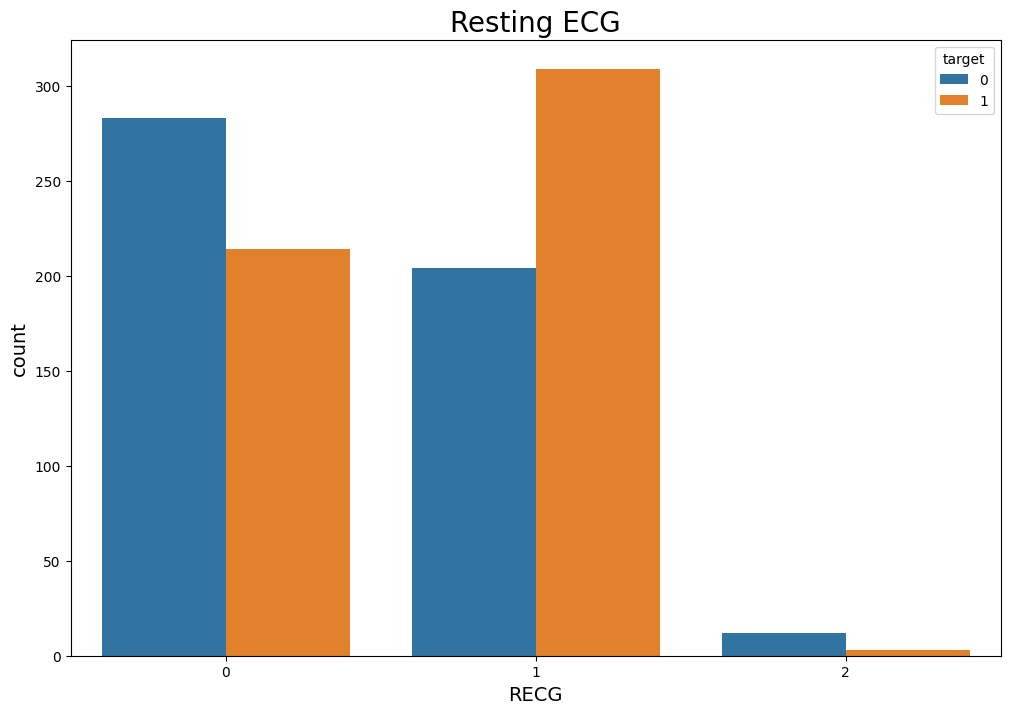

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='restecg', hue='target', data=df)
plt.title("Resting ECG", size=20)
plt.xlabel("RECG", size=14)
plt.ylabel("count", size=14)

People having ST-T Wave abnormality (1) are more prone to Heart Attacks

<Axes: >

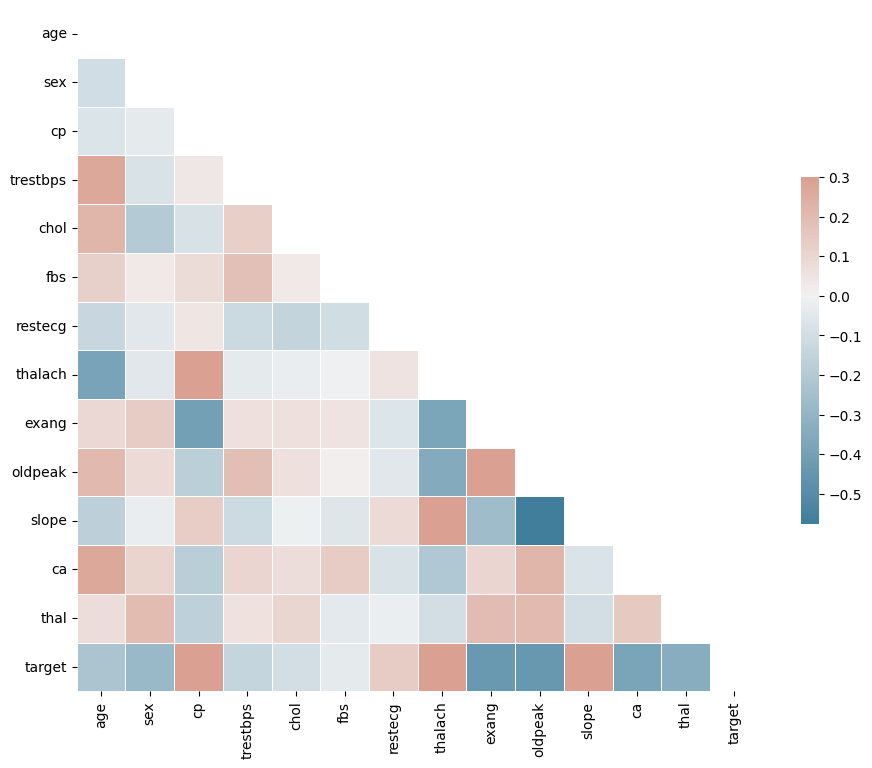

In [ ]:
#plt.figure(figsize=(14,12))
#sns.heatmap(df.corr(), annot=True)

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: title={'center': 'Thalassemia'}, xlabel='thal', ylabel='count'>

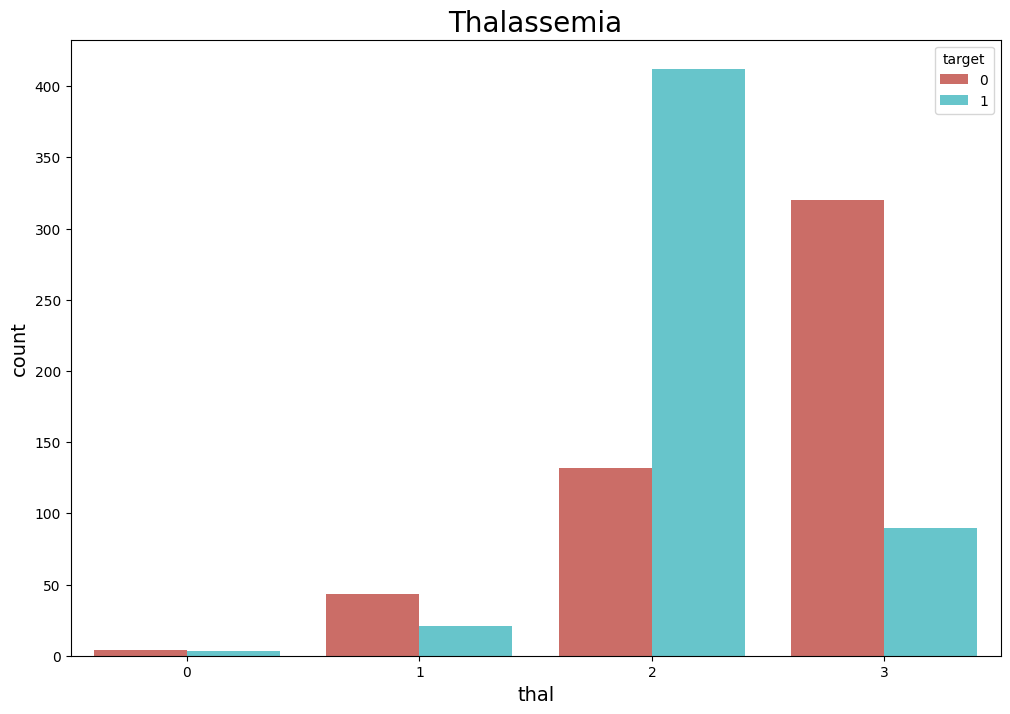

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Thalassemia", size=20)
plt.xlabel("thal", size=14)
plt.ylabel("count", size=14)
sns.countplot(x='thal', hue='target', data=df, color = 'blue', palette = 'hls')

From the pairplot we can observe that there are not may outliers in the data.

#Preprocessing of Data

In [ ]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
df[num_features] = transformer.fit_transform(df[num_features])

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.171905,1,0,0.413233,0.700843,0,1,0.555385,0,0.003306,2,0.006612,3,0
1,0.179017,1,0,0.472874,0.685668,1,0,0.523539,1,0.010471,0,0.000000,3,0
2,0.261178,1,0,0.541012,0.649214,0,1,0.466389,1,0.009701,0,0.000000,3,0
3,0.200290,1,0,0.485949,0.666538,0,1,0.528634,0,0.000000,2,0.003283,3,0
4,0.178553,0,0,0.397425,0.846687,1,1,0.305268,0,0.005472,1,0.008640,2,0
5,0.193599,0,0,0.333792,0.827803,0,0,0.407226,0,0.003338,1,0.000000,2,1
6,0.156635,1,0,0.307869,0.858794,0,2,0.378085,0,0.011883,0,0.008102,1,0
7,0.150715,1,0,0.438442,0.791936,0,0,0.397338,1,0.002192,1,0.002740,3,0
8,0.146011,1,0,0.380897,0.790362,0,0,0.457077,0,0.002539,2,0.000000,3,0
9,0.160593,1,0,0.362822,0.850549,0,0,0.344978,1,0.009517,1,0.005948,2,0


#Feature Selection


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[cat_features]
y = df['target']

chi_features = SelectKBest(chi2, k = 5)
X_kbest_features = chi_features.fit_transform(X, y)
new_cat_features = chi_features.get_feature_names_out(cat_features)

print(chi_features.scores_)

print("Best features for the prediction model:",new_cat_features)
print(X_kbest_features)

[ 24.37365008 217.82392171   1.47754962   9.73934262 130.47092725
  33.67394807  19.37346461]
Best features for the prediction model: ['sex' 'cp' 'exang' 'slope' 'thal']
[[1 0 0 2 3]
 [1 0 1 0 3]
 [1 0 1 0 3]
 ...
 [1 0 1 1 2]
 [0 0 0 2 2]
 [1 0 0 1 3]]


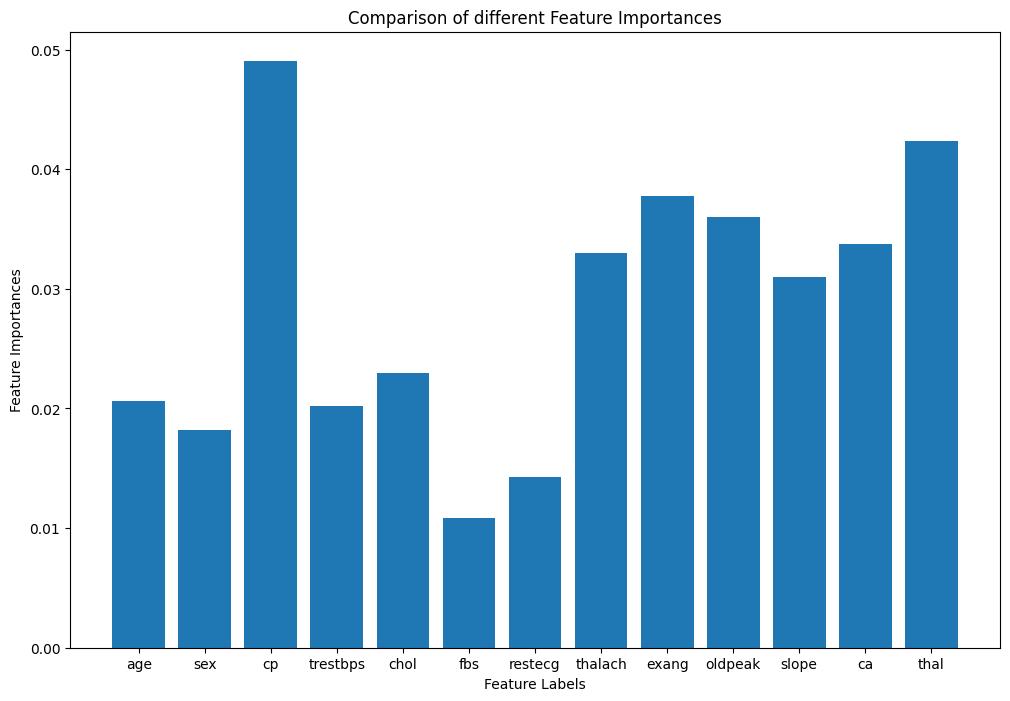

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X = df.drop('target', axis=1)
y = df['target']

extra_tree_forest = ExtraTreesClassifier(n_estimators = 150,
                                        criterion ='entropy', 
                                        
                                        max_features = 'log2')

extra_tree_forest.fit(X,y)


feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

plt.figure(figsize=(12,8))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

X = df[num_features]
y = df['target']

fs = SelectKBest(score_func=f_regression,k=4)
fit = fs.fit(X,y)

features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)

feature_score.columns = ["Input_Features","F_Score"]

new_num_features = fs.get_feature_names_out(num_features)
print(new_num_features)

print(feature_score.nlargest(6,columns="F_Score"))

['chol' 'thalach' 'oldpeak' 'ca']
  Input_Features     F_Score
4        oldpeak  236.000780
3        thalach  180.115966
5             ca  162.517180
2           chol   48.171103
0            age   36.811116
1       trestbps   11.540899


So the best features for the prediction model can taken as follows:

Categorical : `['cp', 'exang', 'slope', 'sex', 'thal']`

Numerical : `['oldpeak', 'thalach', 'ca']`

In [ ]:
df = df[['cp', 'exang', 'slope', 'sex', 'thal', 'oldpeak', 'thalach', 'ca', 'target']]
df.head()

,cp,exang,slope,sex,thal,oldpeak,thalach,ca,target
0,0,0,2,1,3,0.003306,0.555385,0.006612,0
1,0,1,0,1,3,0.010471,0.523539,0.000000,0
2,0,1,0,1,3,0.009701,0.466389,0.000000,0
3,0,0,2,1,3,0.000000,0.528634,0.003283,0
4,0,0,1,0,2,0.005472,0.305268,0.008640,0


#**Prediction models**

##Neural Network 


In [ ]:
df1 = pd.get_dummies(df, columns = ['sex', 'cp', 'exang', 'thal'])
column_to_move = df1.pop("target")
df1.insert(16, "target", column_to_move)
df1

,slope,oldpeak,thalach,ca,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3,target
0,2,0.003306,0.555385,0.006612,0,1,1,0,0,0,1,0,0,0,0,1,0
1,0,0.010471,0.523539,0.000000,0,1,1,0,0,0,0,1,0,0,0,1,0
2,0,0.009701,0.466389,0.000000,0,1,1,0,0,0,0,1,0,0,0,1,0
3,2,0.000000,0.528634,0.003283,0,1,1,0,0,0,1,0,0,0,0,1,0
4,1,0.005472,0.305268,0.008640,1,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2,0.000000,0.521706,0.000000,0,1,0,1,0,0,0,1,0,0,1,0,1
1021,1,0.008613,0.433736,0.003076,0,1,1,0,0,0,0,1,0,0,0,1,0
1022,1,0.003103,0.366149,0.003103,0,1,1,0,0,0,0,1,0,0,1,0,0
1023,2,0.000000,0.492100,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,1


There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
3. The number of hidden neurons should be less than twice the size of the input layer.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nn = MLPClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.iloc[:,:-1]
y = df1[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, 
                                                    random_state=67)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "hidden_layer_sizes": [(4,), (11,), (10,3)],
    'alpha': [0.0001, 0.05],
    "learning_rate": ['constant', 'adaptive'],
    "max_iter": [200, 250, 300]
}


clf = GridSearchCV(nn, params, cv=5, n_jobs=-1)
clf.fit(X_train,y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(4,), (11,), (10, 3)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [200, 250, 300]})

In [ ]:
pc_param_results = pd.DataFrame(clf.cv_results_)
pc_param_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.266265,0.011636,0.002857,0.000143,0.0001,"(4,)",constant,200,"{'alpha': 0.0001, 'hidden_layer_sizes': (4,), ...",0.764228,0.747967,0.829268,0.796748,0.780488,0.783740,0.027975,31
1,0.336284,0.009368,0.003021,0.000417,0.0001,"(4,)",constant,250,"{'alpha': 0.0001, 'hidden_layer_sizes': (4,), ...",0.788618,0.772358,0.495935,0.829268,0.861789,0.749593,0.130629,35
2,0.398316,0.025746,0.002722,0.000089,0.0001,"(4,)",constant,300,"{'alpha': 0.0001, 'hidden_layer_sizes': (4,), ...",0.739837,0.756098,0.853659,0.829268,0.837398,0.803252,0.046106,28
3,0.263575,0.009186,0.003201,0.000871,0.0001,"(4,)",adaptive,200,"{'alpha': 0.0001, 'hidden_layer_sizes': (4,), ...",0.512195,0.772358,0.837398,0.837398,0.813008,0.754472,0.123449,33
4,0.326787,0.006049,0.002749,0.000069,0.0001,"(4,)",adaptive,250,"{'alpha': 0.0001, 'hidden_layer_sizes': (4,), ...",0.788618,0.788618,0.853659,0.813008,0.845528,0.817886,0.027498,20
5,0.368649,0.043267,0.002814,0.000226,0.0001,"(4,)",adaptive,300,"{'alpha': 0.0001, 'hidden_layer_sizes': (4,), ...",0.788618,0.780488,0.845528,0.829268,0.853659,0.819512,0.029717,15
6,0.283368,0.002656,0.002938,0.000345,0.0001,"(11,)",constant,200,"{'alpha': 0.0001, 'hidden_layer_sizes': (11,),...",0.796748,0.804878,0.845528,0.829268,0.853659,0.826016,0.022176,6
7,0.372739,0.010603,0.002706,0.000194,0.0001,"(11,)",constant,250,"{'alpha': 0.0001, 'hidden_layer_sizes': (11,),...",0.796748,0.796748,0.845528,0.829268,0.837398,0.821138,0.020568,12
8,0.611770,0.123351,0.004175,0.002786,0.0001,"(11,)",constant,300,"{'alpha': 0.0001, 'hidden_layer_sizes': (11,),...",0.756098,0.780488,0.837398,0.829268,0.861789,0.813008,0.038821,25
9,0.443327,0.091546,0.005050,0.003243,0.0001,"(11,)",adaptive,200,"{'alpha': 0.0001, 'hidden_layer_sizes': (11,),...",0.788618,0.780488,0.853659,0.829268,0.878049,0.826016,0.037292,6


In [ ]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'alpha': 0.0001, 'hidden_layer_sizes': (10, 3), 'learning_rate': 'adaptive', 'max_iter': 250}


Results on the train set:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       304
           1       0.83      0.86      0.85       311

    accuracy                           0.84       615
   macro avg       0.84      0.84      0.84       615
weighted avg       0.84      0.84      0.84       615



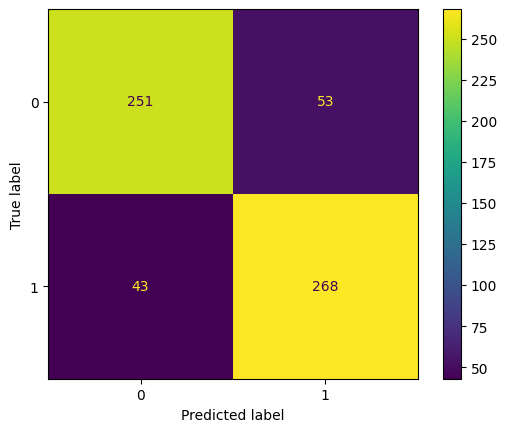

In [ ]:
y_true, y_pred = y_train , clf.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Results on the train set:')
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Results on the test set:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       195
           1       0.85      0.88      0.86       215

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



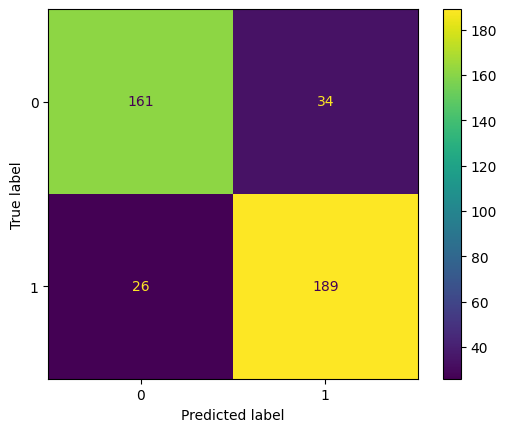

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))


cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

##Logistic Regession

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression()

Results on the train set:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       304
           1       0.83      0.83      0.83       311

    accuracy                           0.83       615
   macro avg       0.83      0.83      0.83       615
weighted avg       0.83      0.83      0.83       615



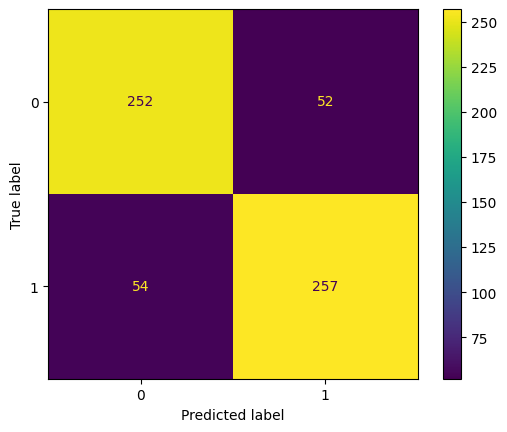

In [ ]:
y_true, y_pred = y_train , log_reg.predict(X_train)
print('Results on the train set:')
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Results on the test set:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       195
           1       0.85      0.87      0.86       215

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



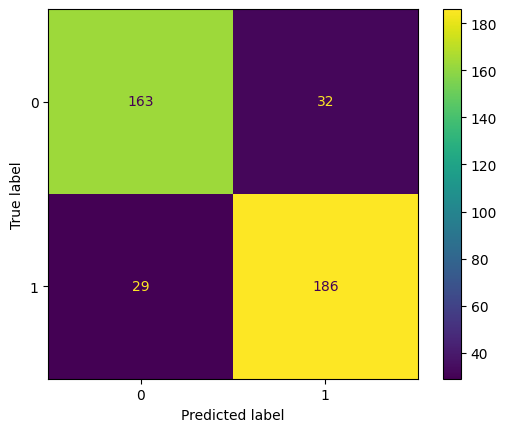

In [ ]:
y_true, y_pred = y_test , log_reg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Results on the test set:')
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

###Using GridSearch to find the best parameters (Hyperparameter tuning)

In [ ]:
param_grid = {"C" : [0.2, 0.5, 0.9],
              "max_iter" : [100, 150, 200, 250, 300, 350, 400],
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'random_state' : [56,146,523]}

In [ ]:
log_reg2 = LogisticRegression()
log_grid_model = GridSearchCV(log_reg2, param_grid, cv=5)
log_grid_model.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.5, 0.9],
                         'max_iter': [100, 150, 200, 250, 300, 350, 400],
                         'random_state': [56, 146, 523],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [ ]:
log_grid_model.best_params_

{'C': 0.5, 'max_iter': 100, 'random_state': 56, 'solver': 'liblinear'}

Results on the train set:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       304
           1       0.83      0.83      0.83       311

    accuracy                           0.83       615
   macro avg       0.83      0.83      0.83       615
weighted avg       0.83      0.83      0.83       615



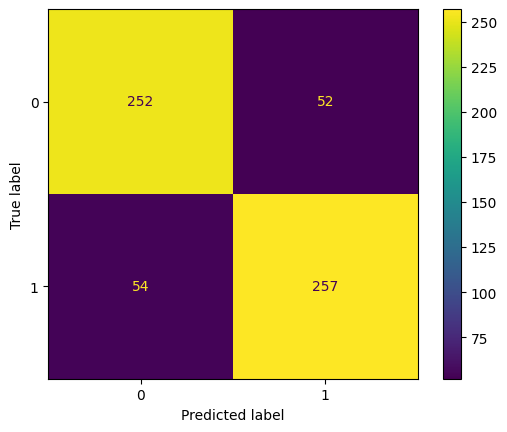

In [ ]:
y_true, y_pred = y_train , log_grid_model.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Results on the train set:')
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Results on the train set:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       195
           1       0.85      0.87      0.86       215

    accuracy                           0.85       410
   macro avg       0.85      0.85      0.85       410
weighted avg       0.85      0.85      0.85       410



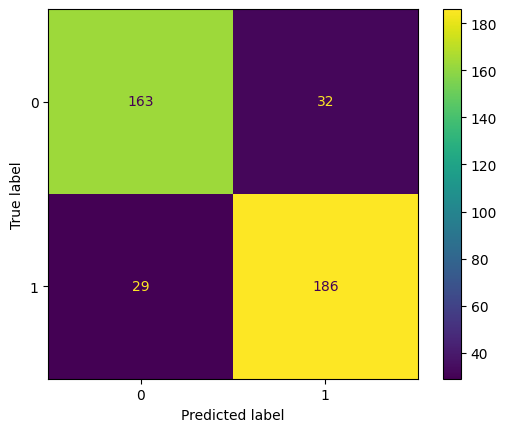

In [ ]:
y_true, y_pred = y_test , log_grid_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('Results on the train set:')
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

##Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':["gini","entropy"]
}


rf_model = RandomForestClassifier(random_state=10)

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}


Training accuracy: 0.9317073170731708

Confusion matrix for train set:


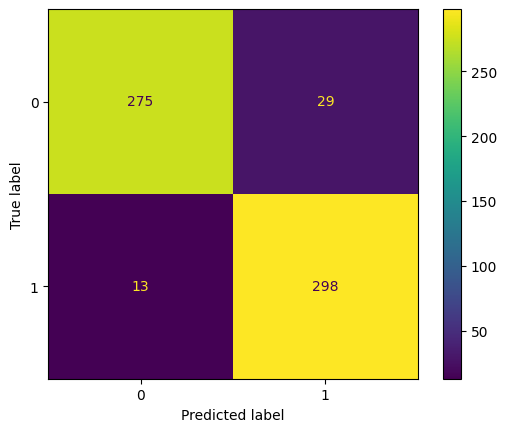

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = grid_search.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_cm_display = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['0', '1'])


print("Training accuracy:", train_accuracy)
print("\nConfusion matrix for train set:")
train_cm_display.plot()

Testing accuracy: 0.8902439024390244

Confusion matrix for test set:


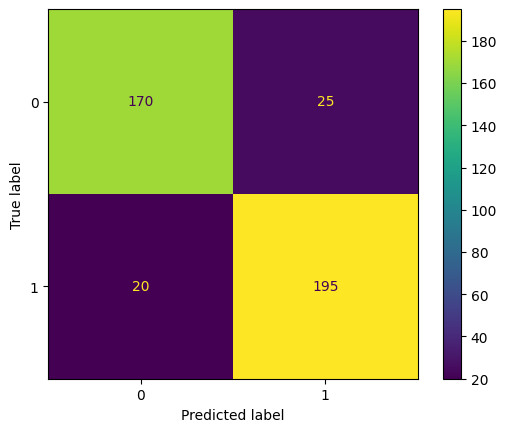

In [ ]:
y_test_pred = grid_search.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_cm_display = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=['0', '1'])

print("Testing accuracy:", test_accuracy)
print("\nConfusion matrix for test set:")
test_cm_display.plot()

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train.values.ravel())
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_conf_display = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix, display_labels = ['0' , '1'])

confussion matrix


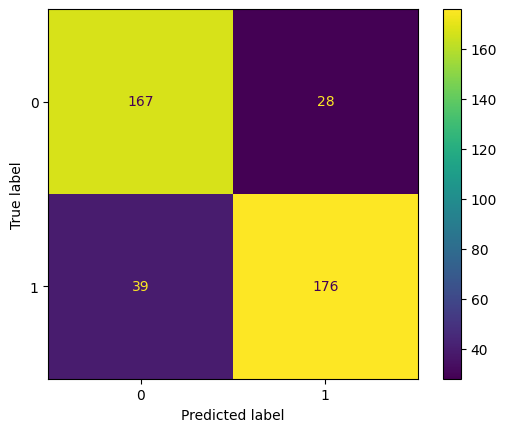

In [ ]:
print("confussion matrix")
knn_conf_display.plot()

In [ ]:
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of K-NeighborsClassifier on test data:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

Accuracy of K-NeighborsClassifier on test data: 83.65853658536585 

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       195
           1       0.86      0.82      0.84       215

    accuracy                           0.84       410
   macro avg       0.84      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410



Confusion matrix for training data


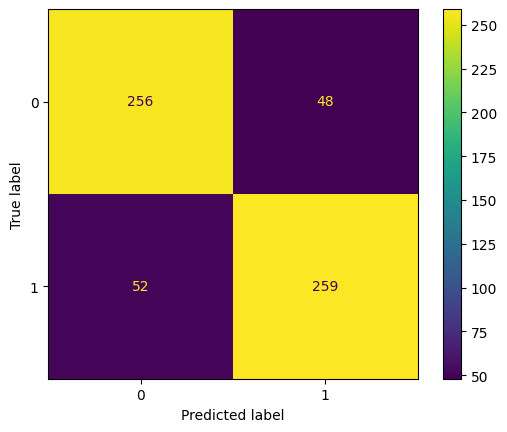

In [ ]:
knn_train_predicted = knn.predict(X_train)

knn_train_conf_matrix = confusion_matrix(y_train, knn_train_predicted)
knn_train_conf_display = ConfusionMatrixDisplay(confusion_matrix=knn_train_conf_matrix, display_labels=['0', '1'])
print("Confusion matrix for training data")
knn_train_conf_display.plot()

In [ ]:
knn_train_acc_score = accuracy_score(y_train, knn_train_predicted)
print("Accuracy of K-NeighborsClassifier on training set:", knn_train_acc_score * 100)
print(classification_report(y_train,knn_train_predicted))

Accuracy of K-NeighborsClassifier on training set: 83.73983739837398
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       304
           1       0.84      0.83      0.84       311

    accuracy                           0.84       615
   macro avg       0.84      0.84      0.84       615
weighted avg       0.84      0.84      0.84       615



Grid Search for KNN



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
knn1 = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

In [ ]:
grid_search_knn = GridSearchCV(knn1, param_grid, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train.values.ravel())

print("Best hyperparameters:", grid_search_knn.best_params_)
print("Accuracy of K-NeighborsClassifier:", grid_search_knn.best_score_ * 100)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Accuracy of K-NeighborsClassifier: 95.44715447154472


Confusion matrix


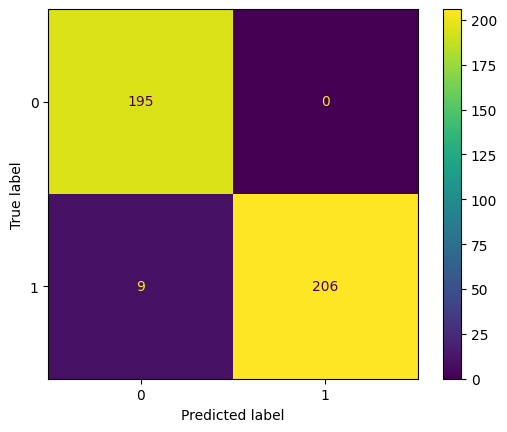

In [ ]:
knn_predicted = grid_search_knn.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_conf_display = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix, display_labels = ['0' , '1'])
print("Confusion matrix")
knn_conf_display.plot() 

In [ ]:
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of K-NeighborsClassifier:", knn_acc_score * 100, '\n')
print(classification_report(y_test, knn_predicted))

Accuracy of K-NeighborsClassifier: 97.80487804878048 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       195
           1       1.00      0.96      0.98       215

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410



In [ ]:
knn_train_score = grid_search.score(X_train, y_train)
print("Accuracy of K-NeighborsClassifier on training set:", knn_train_score * 100)

Accuracy of K-NeighborsClassifier on training set: 93.17073170731707


#Voting of all models

In [ ]:
def voting(X_test):
  models = [clf, log_grid_model, grid_search, grid_search_knn]
  votes = []
  for model in models:
    votes.append(model.predict(X_test))
  my_count = pd.Series(votes).value_counts()
  print(my_count)

#Comparision of models

In [ ]:
acc = pd.DataFrame({"Model" : ["MLP", "Logistic", "Random Forest", "KNN"], 
                    "Before Grid Search" : 
                    ["NA", 
                     accuracy_score(y_test, log_reg.predict(X_test)),
                     "NA",
                     accuracy_score(y_test, knn.predict(X_test))],
                    "After Grid Search" : 
                    [accuracy_score(y_test, clf.predict(X_test)), 
                     accuracy_score(y_test, log_grid_model.predict(X_test)),
                     accuracy_score(y_test, grid_search.predict(X_test)),
                     accuracy_score(y_test, grid_search_knn.predict(X_test))]})


acc

,Model,Before Grid Search,After Grid Search
0,MLP,NA,0.853659
1,Logistic,0.85122,0.851220
2,Random Forest,NA,0.890244
3,KNN,0.836585,0.978049


Text(0, 0.5, 'Accuracy')

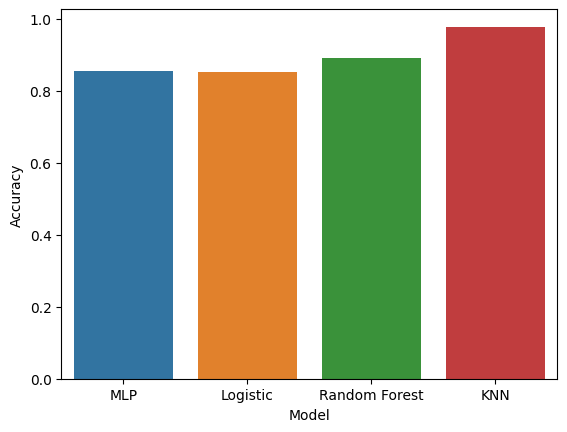

In [ ]:
sns.barplot(data = acc
            ,x = 'Model'
            ,y = 'After Grid Search'
            ).set_ylabel("Accuracy")

Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive. It is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

<Axes: xlabel='Model', ylabel='Recall Score'>

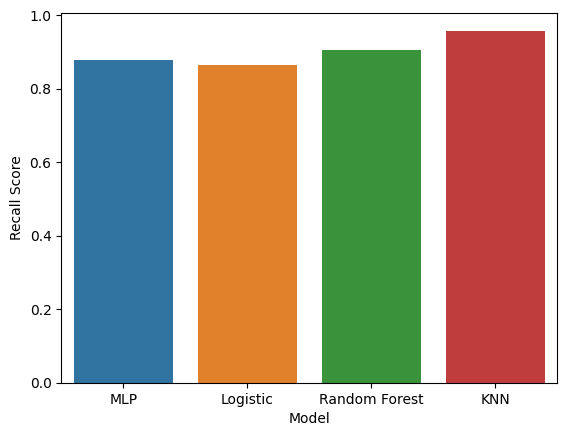

In [ ]:
from sklearn.metrics import recall_score

recall = []
models = [clf, log_grid_model, grid_search, grid_search_knn]
for model in models:
  recall.append(recall_score(y_test, model.predict(X_test)))

recall_df = pd.DataFrame({"Model" : ["MLP", "Logistic", "Random Forest", "KNN"],
                         "Recall Score" : recall})

sns.barplot(data = recall_df
            ,x = 'Model'
            ,y = 'Recall Score'
            )